In [4]:
import pandas as pd
df_raw = pd.read_csv("../data/서울시_응급실.csv",encoding='euc-kr')

df_raw

,기관ID,주소,병원분류,병원분류명,기관명,응급실전화,병원경도,병원위도
0,A1100011,"서울특별시 영등포구 63로 10, 여의도성모병원 (여의도동)",A,종합병원,가톨릭대학교 여의도성모병원,02-3779-1188,126.936731,37.518272
1,A1121013,서울특별시 은평구 통일로 1021 (진관동),A,종합병원,가톨릭대학교은평성모병원,02-1811-7755,126.916150,37.633608
2,A1100047,서울특별시 관악구 관악로 242 (봉천동),B,병원,강남고려병원,02-874-7227,126.956782,37.485619
3,A1123234,"서울특별시 강남구 선릉로 404, 더드림병원 (대치동)",B,병원,강남더드림병원,070-4676-5002,127.050967,37.500990
4,A1100141,"서울특별시 강남구 남부순환로 2649, 베드로병원 (도곡동)",A,종합병원,강남베드로병원,1544-7522,127.039587,37.485612
...,...,...,...,...,...,...,...,...
66,A1100038,"서울특별시 영등포구 버드나루로7길 12 (영등포동7가, 한강성심병원)",A,종합병원,한림대학교한강성심병원,02-2639-5555,126.910330,37.523467
67,A1100013,서울특별시 성동구 왕십리로 222-1 (사근동),A,종합병원,한양대학교병원,02-2290-8284,127.044883,37.559945
68,A1100051,서울특별시 광진구 자양로 85 (자양동),A,종합병원,혜민병원,02-2049-9119,127.083601,37.535316
69,A1100019,"서울특별시 양천구 목동로 225, 홍익병원본관 (신정동)",A,종합병원,홍익병원,02-2600-0777,126.863664,37.528441


In [6]:

# 예시 데이터프레임
df_raw['자치구'] = df_raw['주소'].str.extract(r'서울특별시\s(\S+구)')

# 2. 자치구별 응급실 수 집계
df_emergency = df_raw.groupby('자치구').size().reset_index(name='응급실 수')

df_emergency

,자치구,응급실 수
0,강남구,6
1,강동구,3
2,강북구,3
3,강서구,5
4,관악구,4
5,광진구,2
6,구로구,2
7,금천구,1
8,노원구,3
9,도봉구,1


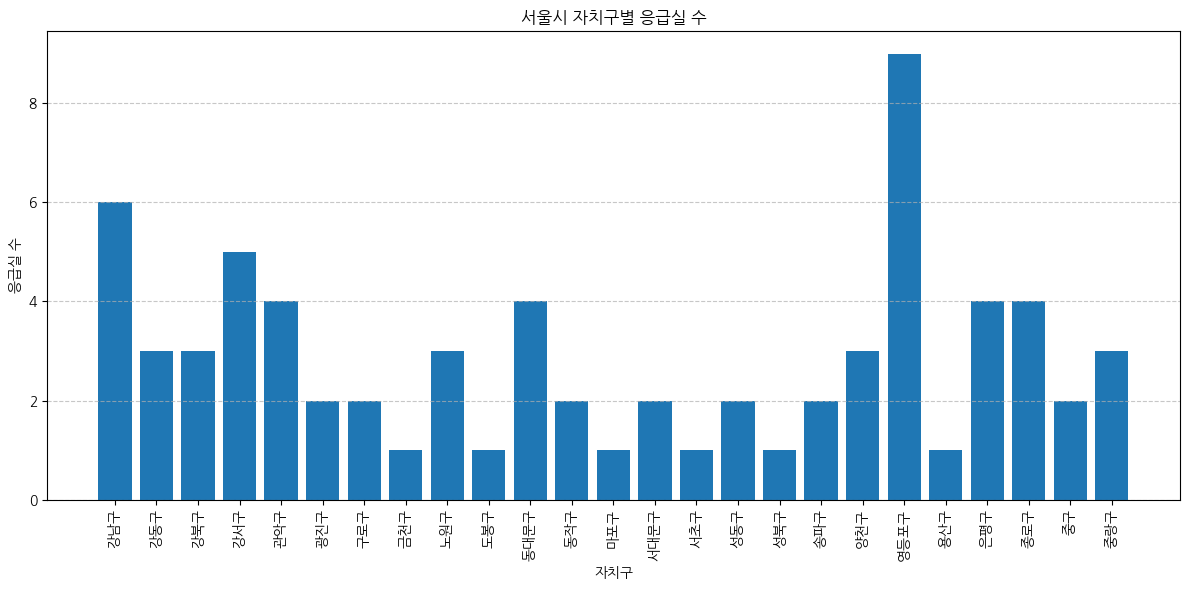

In [18]:

import matplotlib.pyplot as plt
import koreanize_matplotlib

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(df_emergency["자치구"], df_emergency["응급실 수"])
plt.xticks(rotation=90)
plt.xlabel("자치구")
plt.ylabel("응급실 수")
plt.title("서울시 자치구별 응급실 수")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

-----------------------------
# 구를 구_ID로 바꾼다

In [8]:
import mysql.connector

gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', 
           '광진구', '구로구', '금천구', '노원구', '도봉구', 
           '동대문구', '동작구', '마포구', '서대문구', '서초구', 
           '성동구', '성북구', '송파구', '양천구', '영등포구', 
           '용산구', '은평구', '종로구', '중구', '중랑구']

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

In [10]:
df_db = df_emergency.copy()
for i in range(len(gu_list)):
    df_db.iloc[i,0] = i

df_db['자치구']=df_db['자치구'].astype(int)

-------------
# 테이블 수정

In [11]:
##### 바꿀 테이블로 이름 바꾸기.
sql = "insert into gu_emergency_room values (%s,%s)"
cursor = conn.cursor(buffered=True)

In [12]:
import numpy as np

def convert_types(row):
    new_row = []
    for item in row:
        if isinstance(item, (np.int64, np.integer)):
            new_row.append(int(item))
        elif isinstance(item, (np.float64, np.floating)):
            new_row.append(float(item))
        else:
            new_row.append(item)
    return tuple(new_row)

data = [convert_types(row) for row in df_db.values]

cursor.executemany(sql, data)
conn.commit()

In [17]:
conn.close()